In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tradingeconomics as te
from dotenv import load_dotenv
import plotly.express as px
from IPython.display import Image
import os
from urllib.request import urlopen
import datetime as dt  # Correct import for datetime


api_key = os.getenv('TRADING_ECONOMICS_API_KEY')
te.login(api_key)
load_dotenv() 

True

Data Exploratory

In [2]:
try:
    commodities_data = te.getMarketsData(marketsField='commodities', output_type='df') 
except Exception as e:
    print("Error fetching commodities data:", e)
commodities_data

,Symbol,Ticker,Name,Country,Date,State,Last,Close,CloseDate,Group,...,yesterday,lastWeek,lastMonth,lastYear,startYear,decimals,unit,frequency,StartDate,LastUpdate
0,C 1:COM,C A,Corn,commodity,2024-07-10T14:16:18.757,OPEN,400.8352,400.8352,2024-07-10T14:16:00,Agricultural,...,408.5000,419.5000,449.5000,494.5000,471.2500,4.0,USd/BU,Live,1912-05-01T00:00:00,2024-07-10T14:16:00
1,IUC:COM,IUC,Indium,commodity,2024-07-10T00:00:00,CLOSED,2900.0000,2900.0000,2024-07-10T00:00:00,Industrial,...,2975.0000,3075.0000,3075.0000,2075.0000,2005.0000,0.0,CNY/Kg,daily,2017-11-24T00:00:00,2024-07-10T12:54:00
2,MVNLRTR:IND,MVNLRTR,Nuclear Energy Index,commodity,2024-07-10T14:15:22.037,OPEN,30.6800,30.6800,2024-07-10T14:15:00,Index,...,29.9000,29.7100,28.9500,21.5800,27.6900,2.0,USD,Delayed,2010-11-05T00:00:00,2024-07-10T14:15:00
3,KSP:COM,KSP,Kraft Pulp,Commodity,2024-07-10T00:00:00,CLOSED,5670.0000,5670.0000,2024-07-10T00:00:00,Industrial,...,5702.0000,5940.0000,5944.0000,5324.0000,5620.0000,2.0,CNY/T,Daily,2018-11-27T00:00:00,2024-07-10T12:54:00
4,NOSMFZ:COM,NOSMFZ,Salmon,Commodity,2024-07-10T00:00:00,CLOSED,86.4000,86.4000,2024-07-10T00:00:00,Livestock,...,95.0100,95.0100,92.1900,101.2000,99.8400,2.0,NOK/KG,Daily,2012-05-25T00:00:00,2024-07-10T12:55:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,HO1:COM,HO1,Heating Oil,commodity,2024-07-10T14:14:44.393,OPEN,2.5186,2.5186,2024-07-10T14:15:00,Energy,...,2.5218,2.6250,2.4316,2.5747,2.4952,4.0,USD/Gal,Live,1980-01-02T00:00:00,2024-07-10T14:15:00
88,XB1:COM,XB1,Gasoline,commodity,2024-07-10T14:16:04.823,OPEN,2.5050,2.5050,2024-07-10T14:16:00,Energy,...,2.5270,2.5876,2.4237,2.5478,2.1258,4.0,USD/Gal,Live,2005-10-03T00:00:00,2024-07-10T14:16:00
89,NG1:COM,NG1,Natural gas,commodity,2024-07-10T14:15:33.743,OPEN,2.3190,2.3190,2024-07-10T14:16:00,Energy,...,2.3440,2.4430,3.1290,2.6920,2.3270,4.0,USD/MMBtu,Live,1990-04-03T00:00:00,2024-07-10T14:16:00
90,CO1:COM,COG1,Brent,commodity,2024-07-10T14:15:23.313,OPEN,84.7029,84.7029,2024-07-10T14:15:00,Energy,...,84.6600,86.6300,81.9200,79.0700,77.0400,3.0,USD/Bbl,Live,1970-04-15T00:00:00,2024-07-10T14:15:00


In [3]:
commodities_data.columns

Index(['Symbol', 'Ticker', 'Name', 'Country', 'Date', 'State', 'Last', 'Close',
       'CloseDate', 'Group', 'URL', 'Importance', 'DailyChange',
       'DailyPercentualChange', 'WeeklyChange', 'WeeklyPercentualChange',
       'MonthlyChange', 'MonthlyPercentualChange', 'YearlyChange',
       'YearlyPercentualChange', 'YTDChange', 'YTDPercentualChange',
       'day_high', 'day_low', 'yesterday', 'lastWeek', 'lastMonth', 'lastYear',
       'startYear', 'decimals', 'unit', 'frequency', 'StartDate',
       'LastUpdate'],
      dtype='object')

In [4]:
commodities_group = commodities_data.query('Group == "Metals" or Group == "Industrial"')[['Symbol','Name', 'Close', 'Group', 'frequency', 'unit', 'Date']]
commodities_group

,Symbol,Name,Close,Group,frequency,unit,Date
1,IUC:COM,Indium,2900.0000,Industrial,daily,CNY/Kg,2024-07-10T00:00:00
3,KSP:COM,Kraft Pulp,5670.0000,Industrial,Daily,CNY/T,2024-07-10T00:00:00
5,POL:COM,Polyethylene,8369.0000,Industrial,Daily,CNY/T,2024-07-09T00:00:00
7,SODASH:COM,Soda Ash,1956.0000,Industrial,Daily,CNY/T,2024-07-10T00:00:00
8,PYL:COM,Polypropylene,7692.0000,Industrial,Daily,CNY/T,2024-07-09T00:00:00
9,PVC:COM,Polyvinyl,5856.0000,Industrial,Daily,CNY/T,2024-07-09T00:00:00
11,SREMNDM:COM,Neodymium,457500.0000,Industrial,daily,CNY/T,2024-07-10T00:00:00
15,UFI:COM,Di-ammonium,541.5000,Industrial,Daily,USD/T,2024-07-09T00:00:00
16,UFB:COM,Urea,301.5000,Industrial,Daily,USD/T,2024-07-09T00:00:00
17,TTSG:COM,Titanium,48.5000,Metals,Daily,CNY/KG,2024-07-10T00:00:00


In [15]:
import pandas as pd
import tradingeconomics as te
from dotenv import load_dotenv
import os

# Load environment variables and log in to Trading Economics API
load_dotenv()
api_key = os.getenv('TRADING_ECONOMICS_API_KEY')
te.login(api_key)

# Define the critical minerals and their corresponding names

critical_minerals = {
    'LC:COM': 'Lithium',
    'LCO1:COM': 'Cobalt',
    'LN1:COM': 'Nickel',
    'IMR:COM': 'Manganese',
    'SCO:COM': 'Iron Ore',
    'JBP:COM': 'Steel',
    'LMAHDS03:COM': 'Aluminum',
    'HG1:COM': 'Copper'
}
# Fetch commodities historical data
try:
    symbols = list(critical_minerals.keys())
    raw_df = te.getHistorical(symbol=symbols, initDate='2019-07-01', endDate=pd.to_datetime('today').strftime('%Y-%m-%d'), output_type='df')
    raw_df['Date'] = pd.to_datetime(raw_df['Date'])  # Ensure 'Date' is a datetime object
except Exception as e:
    print("Error fetching commodities data:", e)

# Set 'Date' as the index and 'Symbol' as a column for easier manipulation
raw_df.set_index('Date', inplace=True)
# After converting 'Date' to a datetime object and setting it as an index
raw_df = raw_df[raw_df.index <= pd.to_datetime('today')]


# Group by 'Symbol', resample to include all dates, and fill missing values with the last known value
grouped_df = raw_df.groupby('Symbol')['Close'].resample('D').ffill().unstack(level=0)

# Rename columns using the critical_minerals mapping
grouped_df.rename(columns=critical_minerals, inplace=True)

# Save the DataFrame to an Excel file
grouped_df.to_excel('grouped_commodities_close_prices.xlsx')

print("Data grouped and saved to Excel successfully.")

Data grouped and saved to Excel successfully.


In [21]:
import pandas as pd
import tradingeconomics as te
from dotenv import load_dotenv
import os

# Load environment variables and log in to Trading Economics API
load_dotenv()
api_key = os.getenv('TRADING_ECONOMICS_API_KEY')
te.login(api_key)

# Define the critical minerals and their corresponding names
critical_minerals = {
    'LC:COM': 'Lithium',
    'LCO1:COM': 'Cobalt',
    'LN1:COM': 'Nickel',
    'IMR:COM': 'Manganese',
    'SCO:COM': 'Iron Ore',
    'JBP:COM': 'Steel',
    'LMAHDS03:COM': 'Aluminum',
    'HG1:COM': 'Copper'
}

# Fetch commodities historical data
try:
    symbols = list(critical_minerals.keys())
    raw_df = te.getHistorical(symbol=symbols, initDate='2019-07-01', endDate=pd.to_datetime('today').strftime('%Y-%m-%d'), output_type='df')
    raw_df['Date'] = pd.to_datetime(raw_df['Date'])  # Ensure 'Date' is a datetime object
except Exception as e:
    print("Error fetching commodities data:", e)

# Set 'Date' as the index and 'Symbol' as a column for easier manipulation
raw_df.set_index('Date', inplace=True)
# After converting 'Date' to a datetime object and setting it as an index
raw_df = raw_df[raw_df.index <= pd.to_datetime('today')]

# Group by 'Symbol', resample to include all dates, and fill missing values with the last known value
grouped_df = raw_df.groupby('Symbol')['Close'].resample('D').ffill().unstack(level=0)

# Rename columns using the critical_minerals mapping
grouped_df.rename(columns=critical_minerals, inplace=True)

# Create a new DataFrame that skips dates where all commodities have no price
filtered_df = grouped_df.dropna(how='all')

# Create a Pandas Excel writer using XlsxWriter as the engine
with pd.ExcelWriter('/Users/yuewang/Project/UN/grouped_commodities_close_prices.xlsx', engine='xlsxwriter') as writer:
    # Write each DataFrame to a different worksheet
    grouped_df.to_excel(writer, sheet_name='All Data')
    filtered_df.to_excel(writer, sheet_name='Filtered Data')

print("Data grouped and saved to Excel successfully with filtered and unfiltered sheets.")

Data grouped and saved to Excel successfully with filtered and unfiltered sheets.


In [20]:
# pip install xlsxwriter

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.9/159.9 kB 2.2 MB/s eta 0:00:00MB/s eta 0:00:01

[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [10]:
# read grouped_commodities_close_prices.xlsx
grouped_df = pd.read_excel('grouped_commodities_close_prices.xlsx', index_col='Date')
grouped_df

,Iron,Manganese,Steel,Lithium,Cobalt,Aluminum,Nickel,Copper
Date,,,,,,,,
2019-01-10,2.5520,37.00,3691,NaN,36000,1726.25,17434.0,92.16
2019-01-11,2.6510,34.50,3494,58500.0,36000,1789.50,16799.0,83.55
2019-01-12,2.6510,34.50,3494,58500.0,36000,1789.50,16799.0,83.55
2019-01-13,2.6510,34.50,3494,58500.0,36000,1789.50,16799.0,83.55
2019-01-14,2.6510,34.50,3494,58500.0,36000,1789.50,16799.0,83.55
...,...,...,...,...,...,...,...,...
2024-12-02,3.7335,29.25,3818,97500.0,28550,2227.00,15783.0,128.87
2024-12-03,3.9265,30.25,3554,112500.0,28550,2265.00,18324.5,113.15
2024-12-04,4.2585,30.75,3440,111500.0,27830,2494.00,17797.0,106.05


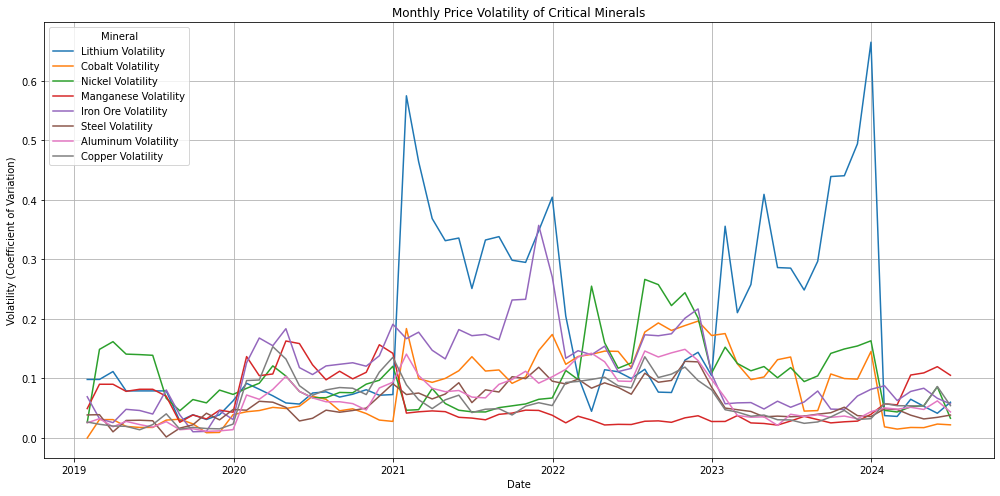

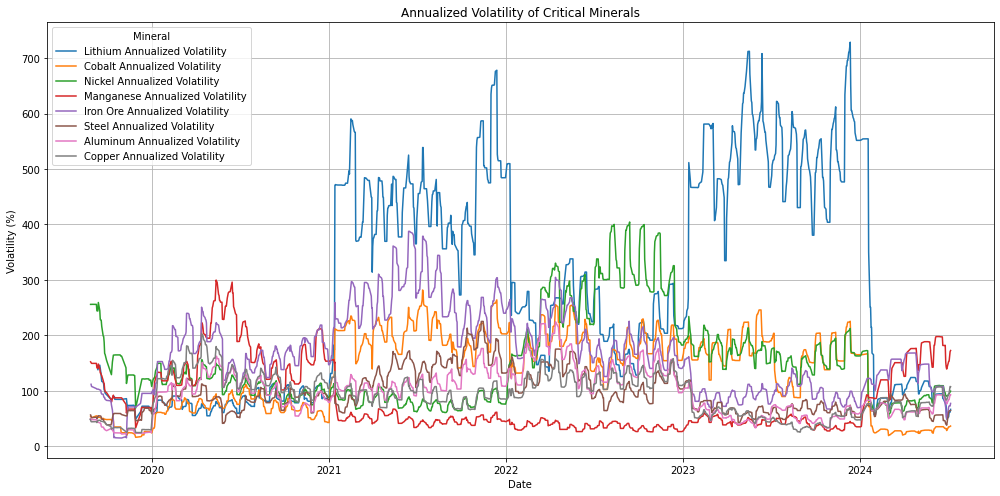

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Initialize result_df as an empty DataFrame
result_df = pd.DataFrame()
critical_minerals = {
    'LC:COM': 'Lithium',
    'LCO1:COM': 'Cobalt',
    'LN1:COM': 'Nickel',
    'IMR:COM': 'Manganese',
    'SCO:COM': 'Iron Ore',
    'JBP:COM': 'Steel',
    'LMAHDS03:COM': 'Aluminum',
    'HG1:COM': 'Copper'
}


# Assuming raw_df and other relevant data are already defined
# List of critical minerals symbols
symbols = critical_minerals.keys()
quarterly_volatility = {}

# Ensure raw_df is sorted by date
raw_df = raw_df.sort_values(by='Date')

for symbol in symbols:
    symbol_data = raw_df[raw_df['Symbol'] == symbol].copy()
    symbol_data.index = pd.to_datetime(symbol_data.index)  # Ensure index is datetime

    # Calculate monthly volatility
    std_dev = symbol_data['Close'].resample('M').std()
    mean_price = symbol_data['Close'].resample('M').mean()

    # Coefficient of Variation (Std Dev / Mean)
    cv = std_dev / mean_price

    # Store computed monthly volatility in the dictionary
    quarterly_volatility[critical_minerals[symbol]] = cv.ffill().bfill()  # Forward and backward fill

    # Fill non-existing trading dates using the previous transaction date for monthly volatility
    symbol_data['Monthly Volatility'] = cv.reindex(symbol_data.index, method='ffill').bfill()

    # Calculate log differences of daily average prices
    symbol_data['Log Diff'] = np.log(symbol_data['Close'] / symbol_data['Close'].shift(1))

    # Calculate rolling standard deviation of log differences (30-day window)
    rolling_std = symbol_data['Log Diff'].rolling(window=30).std()

    # Annualize the rolling standard deviation
    annualized_volatility = rolling_std * np.sqrt(252) * 100  # Assuming 252 trading days in a year

    # Store computed annualized volatility in the symbol_data
    symbol_data['Annualized Volatility'] = annualized_volatility

    # Concatenate the symbol data back to the result DataFrame
    result_df = pd.concat([result_df, symbol_data])

# Ensure data does not exceed last date in original data
last_date = raw_df.index.max()
result_df = result_df[result_df.index <= last_date]

# Visualization of monthly volatilities
fig, ax = plt.subplots(figsize=(14, 7))
for name, data in quarterly_volatility.items():
    ax.plot(data[data.index <= last_date].index, data[data.index <= last_date].values, label=f'{name} Volatility')

ax.set_title('Monthly Price Volatility of Critical Minerals')
ax.set_xlabel('Date')
ax.set_ylabel('Volatility (Coefficient of Variation)')
ax.legend(title='Mineral')
plt.grid(True)

plt.tight_layout()
plt.show()

# Visualization of annualized volatilities
fig, ax = plt.subplots(figsize=(14, 7))
for symbol in symbols:
    if symbol in result_df['Symbol'].unique():
        symbol_data = result_df[result_df['Symbol'] == symbol]
        ax.plot(symbol_data.index, symbol_data['Annualized Volatility'], label=f'{critical_minerals[symbol]} Annualized Volatility')

ax.set_title('Annualized Volatility of Critical Minerals')
ax.set_xlabel('Date')
ax.set_ylabel('Volatility (%)')
ax.legend(title='Mineral')
plt.grid(True)

plt.tight_layout()
plt.show()

# Display the result DataFrame
# import ace_tools as tools; tools.display_dataframe_to_user(name="Result DataFrame", dataframe=result_df)


In [16]:
quarterly_volatility

{'Lithium': Date
 2019-01-31    0.098380
 2019-02-28    0.098380
 2019-03-31    0.111648
 2019-04-30    0.079132
 2019-05-31    0.079132
                 ...   
 2024-03-31    0.065084
 2024-04-30    0.053228
 2024-05-31    0.041563
 2024-06-30    0.060091
 2024-07-31    0.057945
 Freq: M, Name: Close, Length: 67, dtype: float64,
 'Cobalt': Date
 2019-01-31    0.000000
 2019-02-28    0.030914
 2019-03-31    0.030914
 2019-04-30    0.019496
 2019-05-31    0.017764
                 ...   
 2024-03-31    0.017721
 2024-04-30    0.017413
 2024-05-31    0.023441
 2024-06-30    0.022126
 2024-07-31    0.030621
 Freq: M, Name: Close, Length: 67, dtype: float64,
 'Nickel': Date
 2019-01-31    0.026233
 2019-02-28    0.148885
 2019-03-31    0.161840
 2019-04-30    0.140929
 2019-05-31    0.140098
                 ...   
 2024-03-31    0.052403
 2024-04-30    0.054343
 2024-05-31    0.086044
 2024-06-30    0.033137
 2024-07-31    0.082046
 Freq: M, Name: Close, Length: 67, dtype: float64,
 'Mang

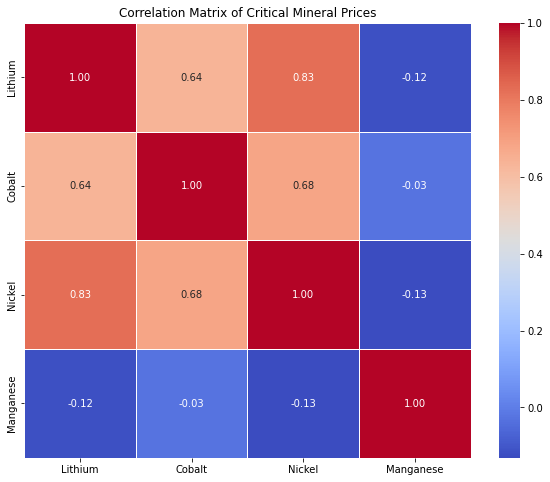

In [16]:
import seaborn as sns

# Create a DataFrame for close prices with critical minerals names as columns
close_prices = pd.DataFrame(index=raw_df.index.unique())
for symbol in symbols:
    if symbol in raw_df['Symbol'].unique():
        symbol_data = raw_df[raw_df['Symbol'] == symbol]
        close_prices[critical_minerals[symbol]] = symbol_data['Close']

close_prices.dropna(inplace=True)

# Calculate the correlation matrix
correlation_matrix = close_prices.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Critical Mineral Prices')
plt.show()

In [13]:
result_df.head(30)

,Symbol,Open,High,Low,Close,Monthly Volatility,Log Diff,Annualized Volatility
Date,,,,,,,,
2019-07-08,LC:COM,65500.0,67000.0,64000.0,65500.0,NaN,NaN,NaN
2019-08-08,LC:COM,65500.0,67000.0,64000.0,65500.0,NaN,0.000000,NaN
2019-09-08,LC:COM,65500.0,67000.0,64000.0,65500.0,NaN,0.000000,NaN
2019-12-08,LC:COM,65500.0,67000.0,64000.0,65500.0,NaN,0.000000,NaN
2019-08-13,LC:COM,65000.0,66500.0,63500.0,65000.0,NaN,-0.007663,NaN
2019-08-14,LC:COM,65000.0,66500.0,63500.0,65000.0,NaN,0.000000,NaN
2019-08-15,LC:COM,64500.0,66000.0,63000.0,64500.0,NaN,-0.007722,NaN
2019-08-16,LC:COM,64000.0,65500.0,62500.0,64000.0,NaN,-0.007782,NaN
2019-08-19,LC:COM,63500.0,65000.0,62000.0,63500.0,NaN,-0.007843,NaN


In [15]:
close_prices = pd.DataFrame(index=raw_df.index.unique())
for symbol in symbols:
    if symbol in raw_df['Symbol'].unique():
        symbol_data = raw_df[raw_df['Symbol'] == symbol]
        close_prices[symbol] = symbol_data['Close']

close_prices.dropna(inplace=True)
correlation_matrix = close_prices.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Critical Mineral Prices')
plt.show()

NameError: name 'sns' is not defined

<Figure size 720x576 with 0 Axes>

Treemap for Critical Mineral Annual Percentage Change

In [11]:
commodities_data = te.getMarketsData(marketsField='commodities', output_type='df') 
commodities = commodities_data.rename(columns={'YearlyPercentualChange': 'Year%Change'})
commodities['Name'] = commodities['Name'].str.replace("Index", "")
fig = px.treemap(commodities, path=[px.Constant("Commodities"),'Group', 'Name'], color='Year%Change', color_continuous_scale='rdylgn',color_continuous_midpoint=0)
fig.update_layout(
    margin = dict(t=0, l=0, r=0, b=0),autosize=False,
    width=1200,
    height=700
)
fig.update_traces(hovertemplate='%{label}<br>Year % Change= %{customdata[0]}%<extra></extra>')
fig.show()

In [72]:
# critical_minerals = [
#     'Iron Ore',  # Assuming 'Iron Ore' maps to 'SCO:COM'
#     'Steel',     # Assuming 'Steel' maps to 'JBP:COM'
#     'Aluminum',  # Assuming 'Aluminum' maps to 'LMAHDS03:COM'
#     'Lithium',   # Assuming 'Lithium' maps to 'LC:COM'
#     'Cobalt',    # Assuming 'Cobalt' maps to 'LCO1:COM'
#     'Nickel',    # Assuming 'Nickel' maps to 'LN1:COM'
#     'Copper',    # Assuming 'Copper' maps to 'HG1:COM'
#     'Manganese'  # Assuming 'Manganese' maps to 'IMR:COM'
# ]

# filtered_commodities = commodities[commodities['Name'].isin(critical_minerals)]
# # Create a treemap visualization
# fig_cm = px.treemap(
#     filtered_commodities,
#     path=[px.Constant("Commodities"), 'Group', 'Name'],
#     color='Year%Change',
#     color_continuous_scale='RdYlGn',
#     color_continuous_midpoint=0
# )
# fig_cm.update_traces(hovertemplate='%{label}<br>Year % Change= %{customdata[0]}%<extra></extra>')
# fig_cm.show()
